In [136]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [138]:
df = pd.read_csv('./winequality-white.csv') #sep=';')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6


In [214]:
df.tail(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4897,6.00,0.21,0.38,0.80,0.02,22.00,98.00,0.99,3.26,0.32,11.80,1
4898,8.02,1.10,0.22,1.90,0.31,25.22,67.22,1.21,3.22,0.90,10.02,0
4899,7.42,1.05,0.23,2.20,0.41,15.22,60.22,1.22,3.52,0.77,9.82,1
4900,8.12,1.11,0.23,1.70,0.30,22.22,57.22,1.22,3.26,0.86,10.02,0
4901,7.92,1.08,0.24,2.30,0.29,11.22,38.22,1.21,3.12,0.30,9.62,0


In [139]:
id_number = 0.22

data = {
    'fixed acidity': [7.8 + id_number, 7.2 + id_number, 7.9 + id_number, 7.7 + id_number],
    'volatile acidity': [0.88 + id_number, 0.83 + id_number, 0.89 + id_number, 0.86 + id_number],
    'citric acid': [0.00 + id_number, 0.01 + id_number, 0.01 + id_number, 0.02 + id_number],
    'residual sugar': [1.9, 2.2, 1.7, 2.3],
    'chlorides': [0.09 + id_number, 0.19 + id_number, 0.08 + id_number, 0.07 + id_number],
    'free sulfur dioxide': [25.0 + id_number, 15.0 + id_number, 22.0 + id_number, 11.0 + id_number],
    'total sulfur dioxide': [67.0 + id_number, 60.0 + id_number, 57.0 + id_number, 38.0 + id_number],
    'density': [0.991 + id_number, 0.996 + id_number, 0.997 + id_number, 0.994 + id_number],
    'pH': [3.22, 3.52, 3.26, 3.12],
    'sulphates': [0.68 + id_number, 0.55 + id_number, 0.64 + id_number, 0.08 + id_number],
    'alcohol': [9.8 + id_number, 9.6 + id_number, 9.8 + id_number, 9.4 + id_number],
    'quality': [5, 6, 2, 3]
}

df = pd.concat([df, pd.DataFrame(data)], ignore_index=True)



In [140]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6


> First check is there any null values in the dataset

## List of data series

In [141]:
# # Define the base data
# base_data = [
#     [7.06, 0.88, 0.02, 1.9, 25.01, 67.5, 0.991, 3.22, 0.68, 9.88, 5],
#     [9.06, 0.88, 0.02, 1.9, 25.01, 67.5, 0.991, 3.22, 0.68, 9.88, 7]
# ]
# placeholder_value = None 

# datarowSeries = [pd.Series(data + [placeholder_value], index=df.columns) for data in base_data]


# df = pd.concat([df, pd.DataFrame(datarowSeries)], ignore_index=True)

In [142]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [143]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,4902.00,6.86,0.84,3.80,6.30,6.80,7.30,14.20
volatile acidity,4902.00,0.28,0.10,0.08,0.21,0.26,0.32,1.11
citric acid,4902.00,0.33,0.12,0.00,0.27,0.32,0.39,1.66
residual sugar,4902.00,6.39,5.07,0.60,1.70,5.20,9.90,65.80
chlorides,4902.00,0.05,0.02,0.01,0.04,0.04,0.05,0.41
free sulfur dioxide,4902.00,35.29,17.01,2.00,23.00,34.00,46.00,289.00
total sulfur dioxide,4902.00,138.29,42.55,9.00,108.00,134.00,167.00,440.00
density,4902.00,0.99,0.01,0.99,0.99,0.99,1.00,1.22
pH,4902.00,3.19,0.15,2.72,3.09,3.18,3.28,3.82
sulphates,4902.00,0.49,0.11,0.22,0.41,0.47,0.55,1.08


<Axes: xlabel='quality', ylabel='Count'>

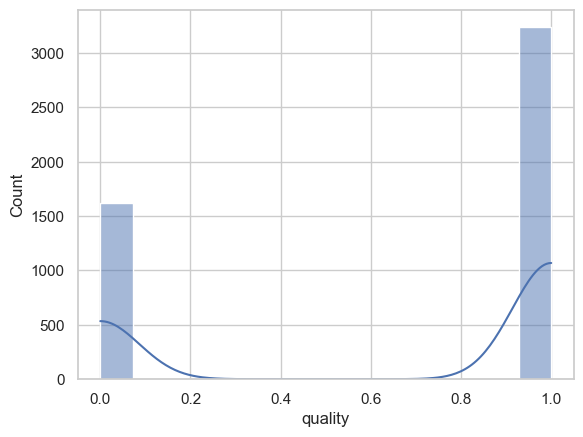

In [215]:
sns.histplot(x='quality',kde='True',data=df)

# EDA

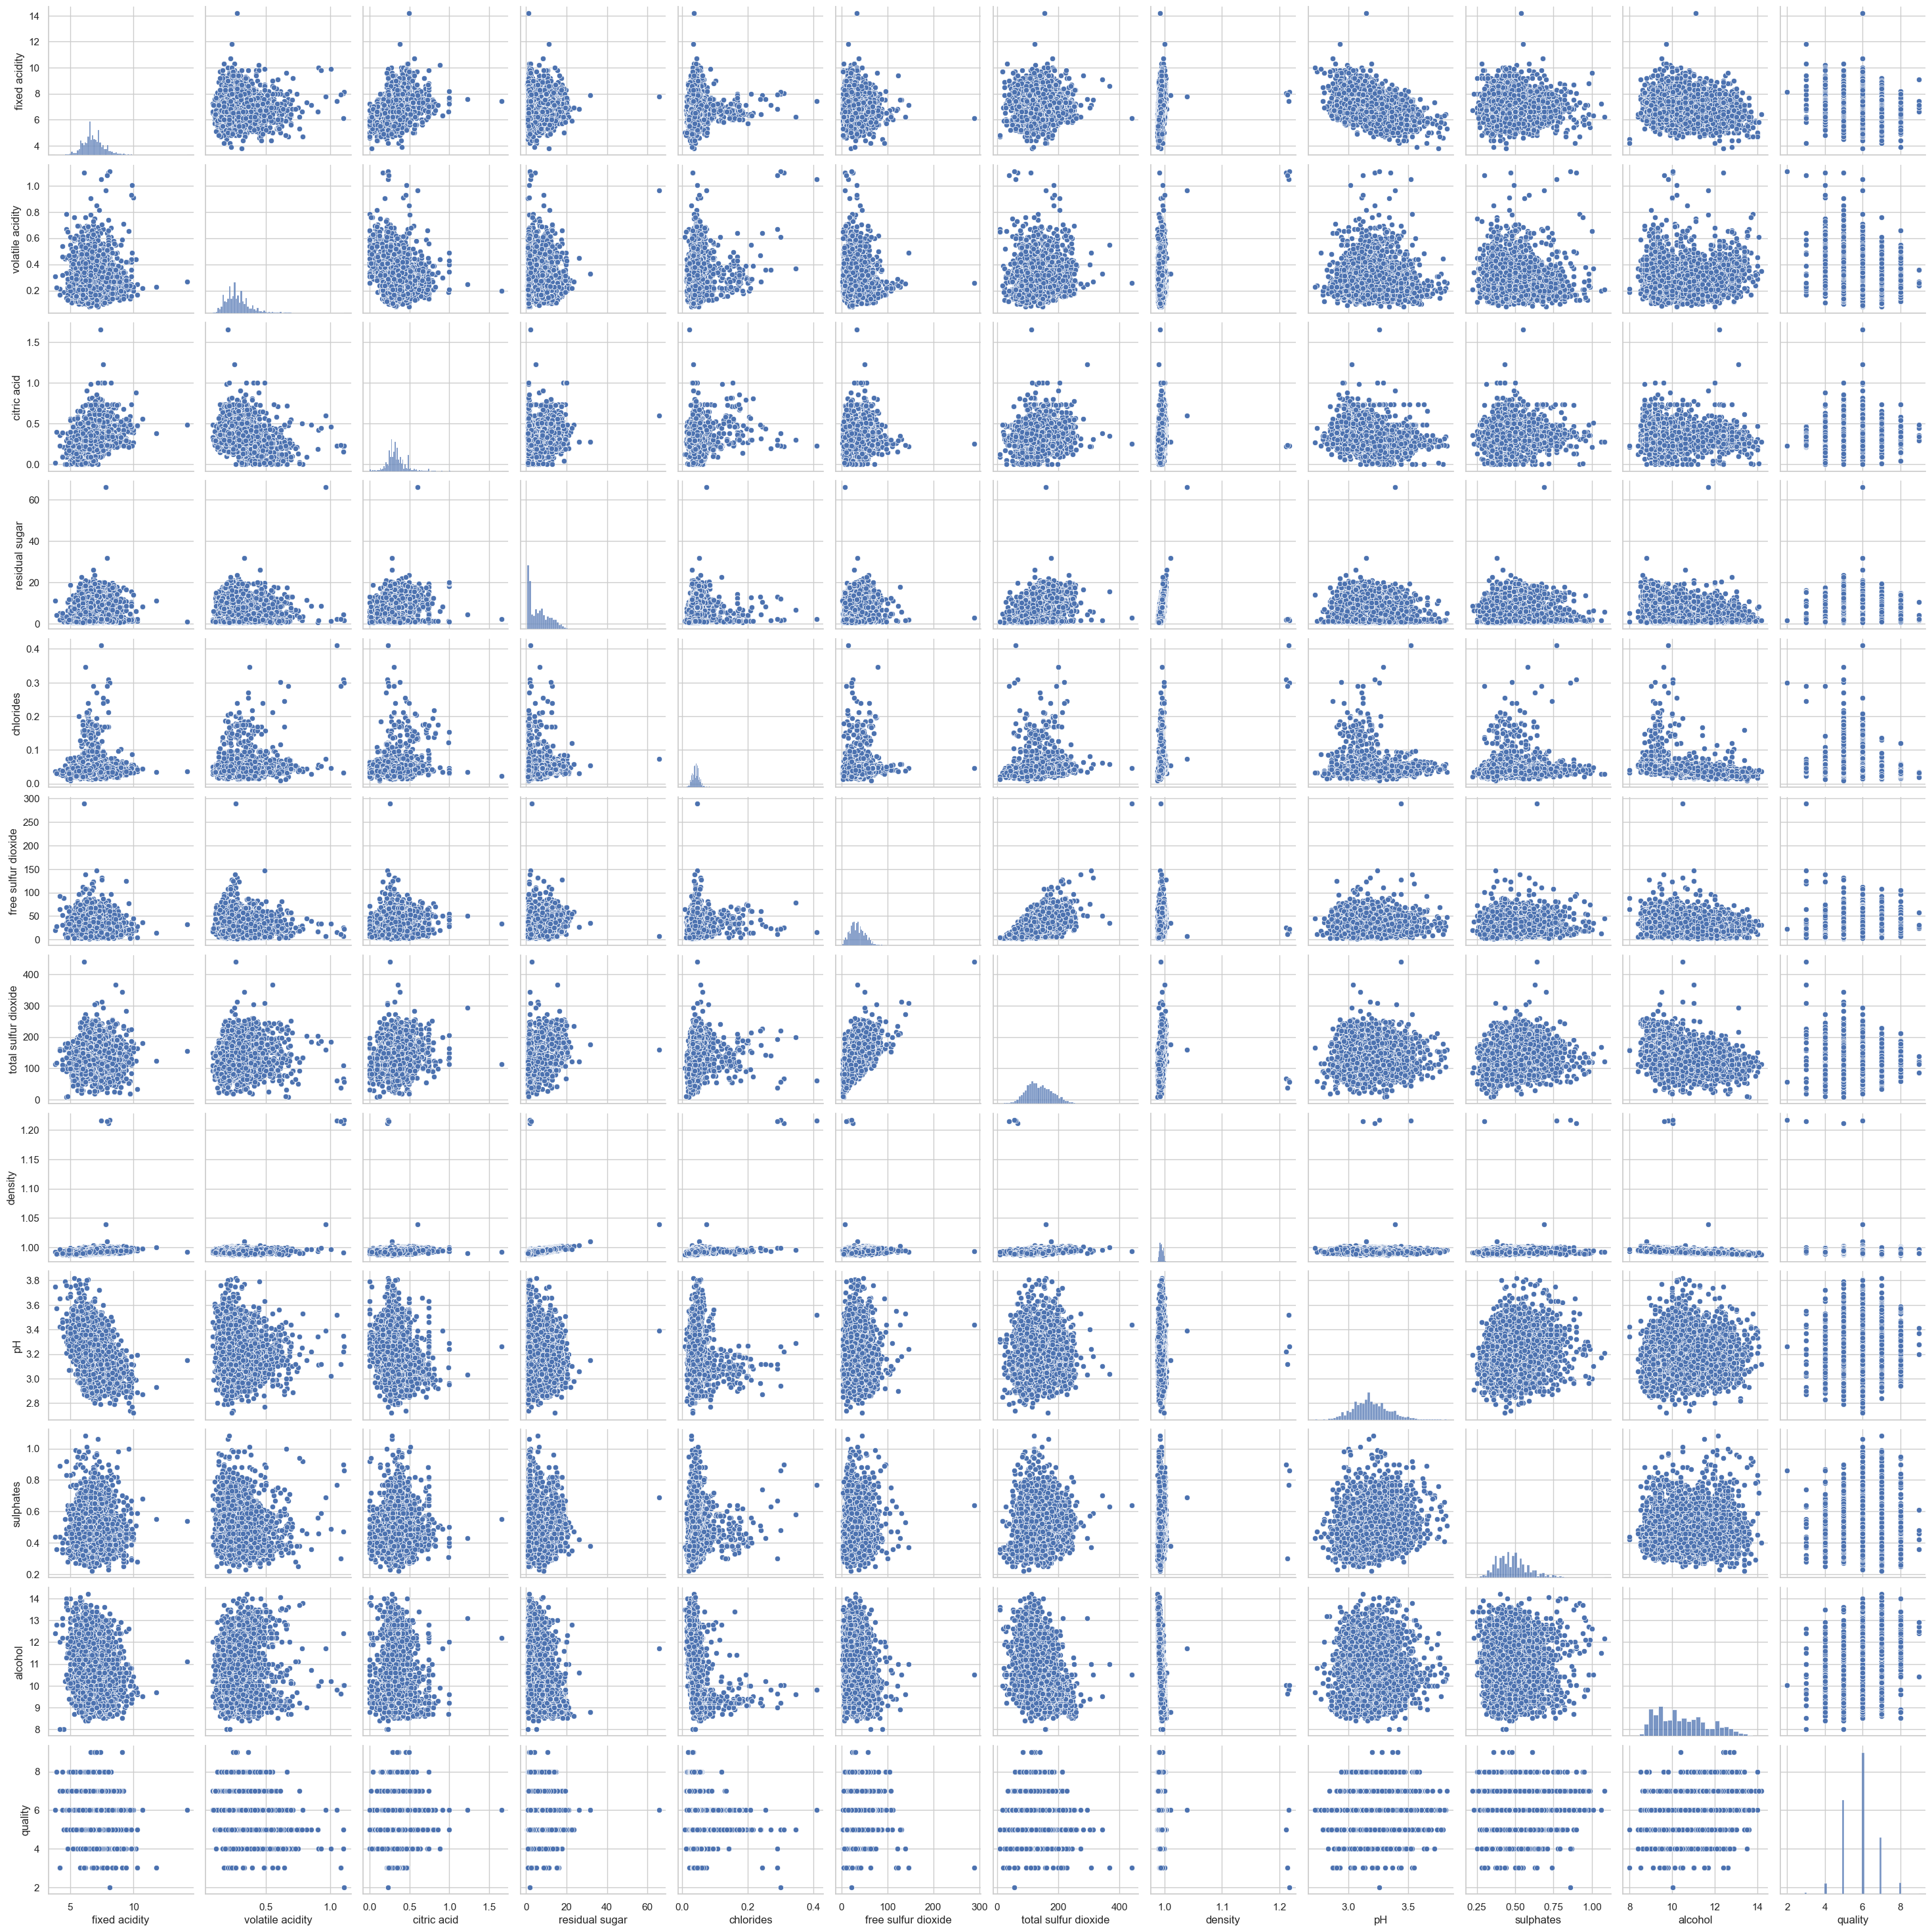

In [144]:
sns.pairplot(df)

In [145]:
df['quality'].value_counts()

quality
6    2199
5    1458
7     880
8     175
4     163
3      21
9       5
2       1
Name: count, dtype: int64

<Axes: xlabel='quality'>

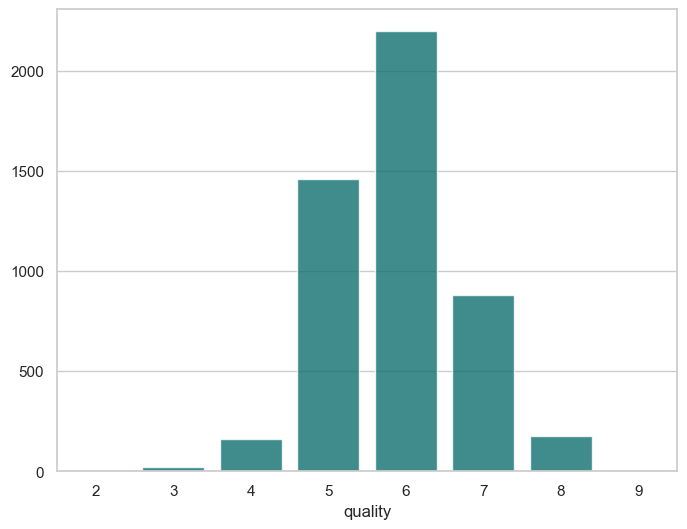

In [146]:
quality_ = df['quality'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=quality_.index, y=quality_.values, alpha=0.8, color='teal')

# Heatmap

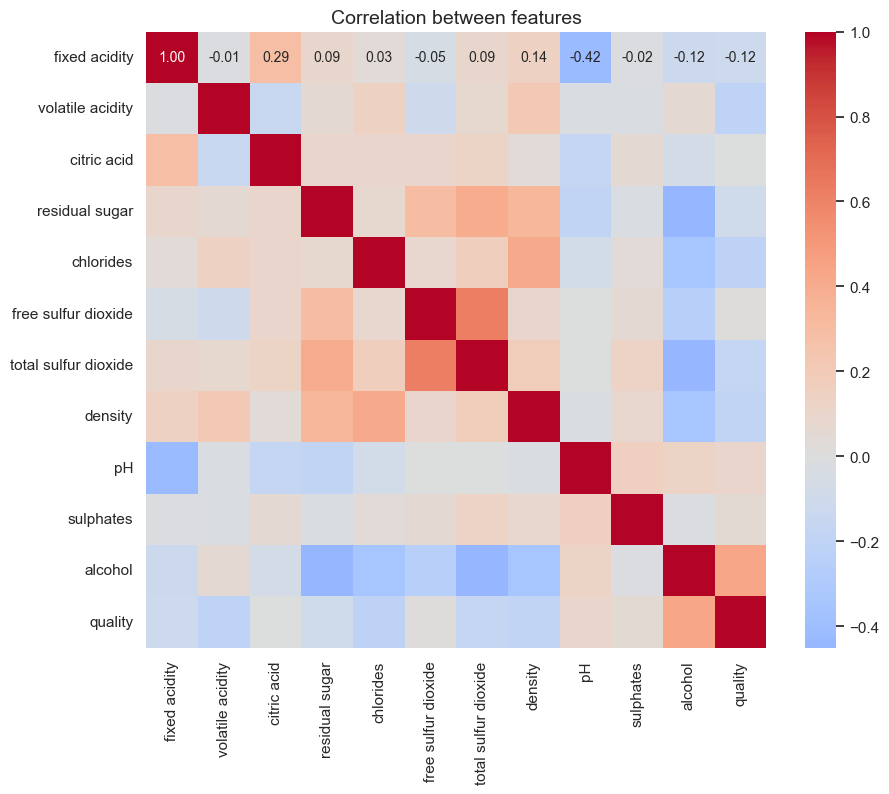

In [147]:
fig, ax = plt.subplots(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm', center=0 , annot_kws={'fontsize':10})
plt.title('Correlation between features', fontsize=14)
plt.show()

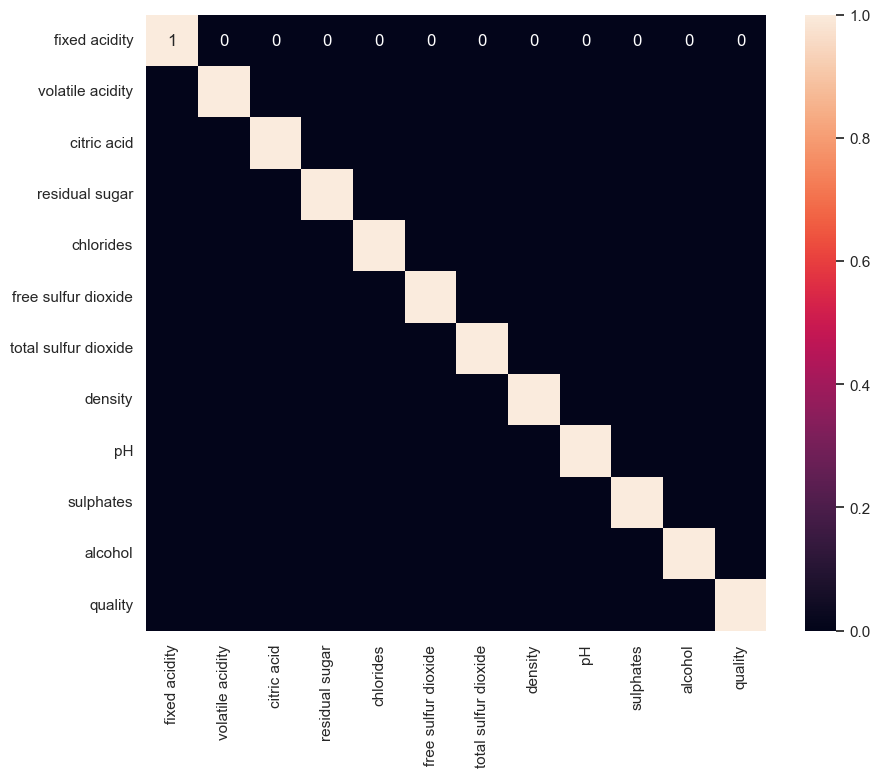

In [148]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr() > 0.7, annot=True)
plt.show()

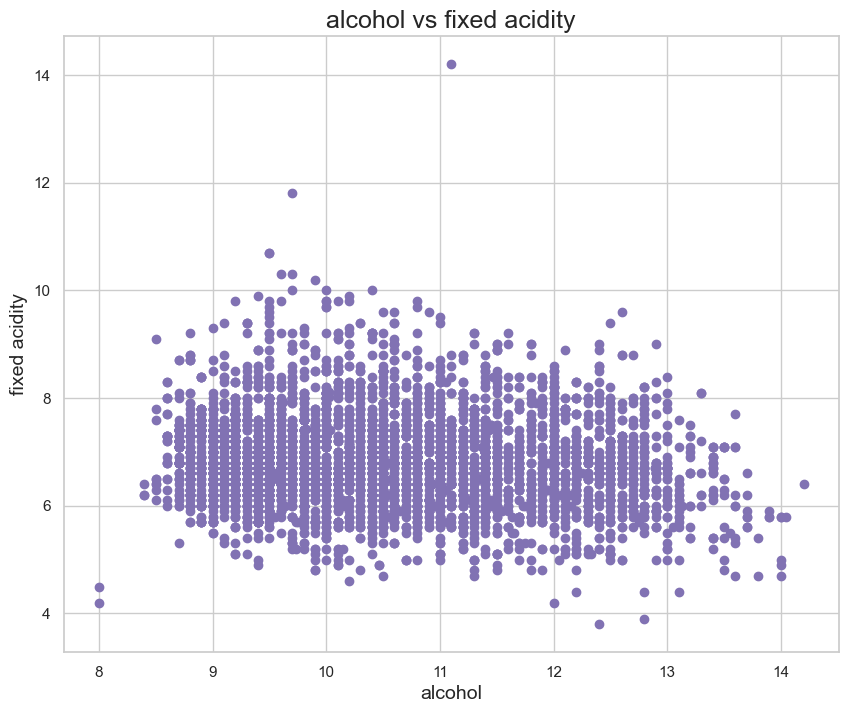

In [149]:
plt.figure(figsize=(10, 8))
plt.scatter(x="alcohol", y="fixed acidity", data=df, marker='o', c='m')
plt.xlabel("alcohol", fontsize=14)
plt.ylabel("fixed acidity", fontsize=14)
plt.title("alcohol vs fixed acidity", fontsize=18)
plt.show()

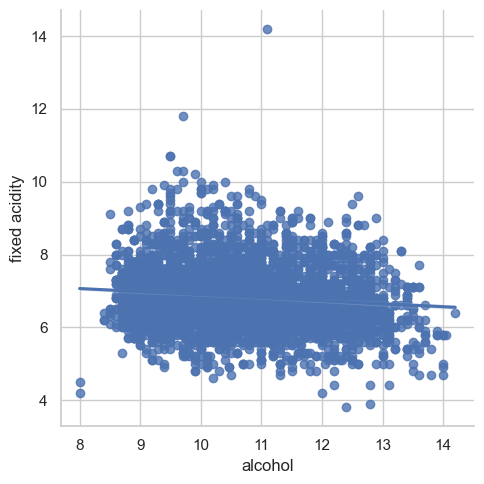

In [150]:
sns.lmplot(x='alcohol', y='fixed acidity', data=df)
plt.show()

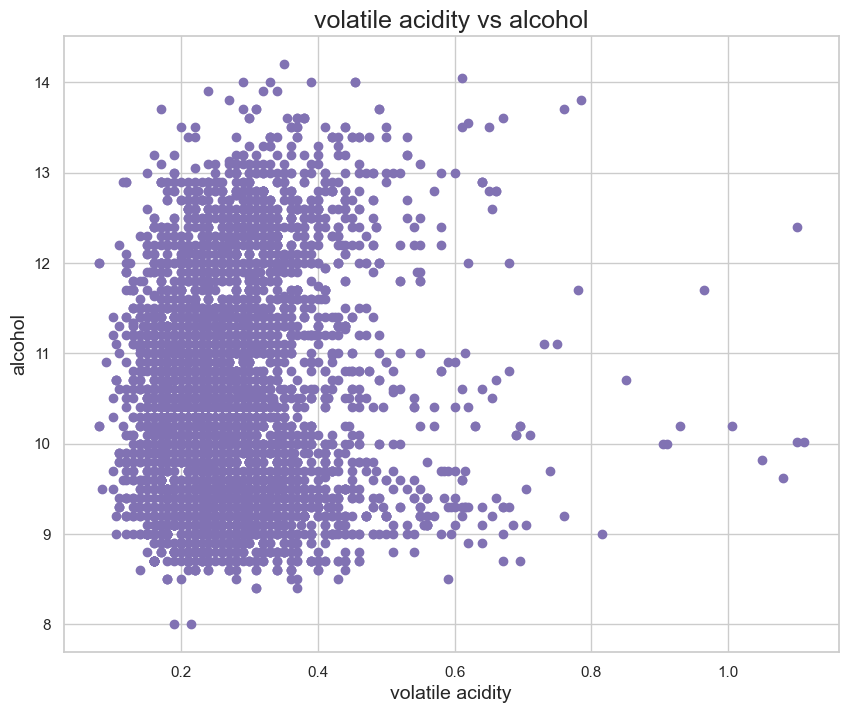

In [151]:
plt.figure(figsize=(10, 8))
plt.scatter(x='volatile acidity', y='alcohol', data=df, marker='o', c='m')
plt.xlabel('volatile acidity', fontsize=14)
plt.ylabel('alcohol', fontsize=14)
plt.title('volatile acidity vs alcohol', fontsize=18)
plt.show()

In [152]:
df.corrwith(df['quality']).abs().sort_values(ascending=False)[1:]

alcohol                0.44
chlorides              0.21
volatile acidity       0.20
density                0.19
total sulfur dioxide   0.17
fixed acidity          0.12
pH                     0.10
residual sugar         0.10
sulphates              0.05
free sulfur dioxide    0.01
citric acid            0.01
dtype: float64

<Axes: title={'center': 'Correlation with quality'}>

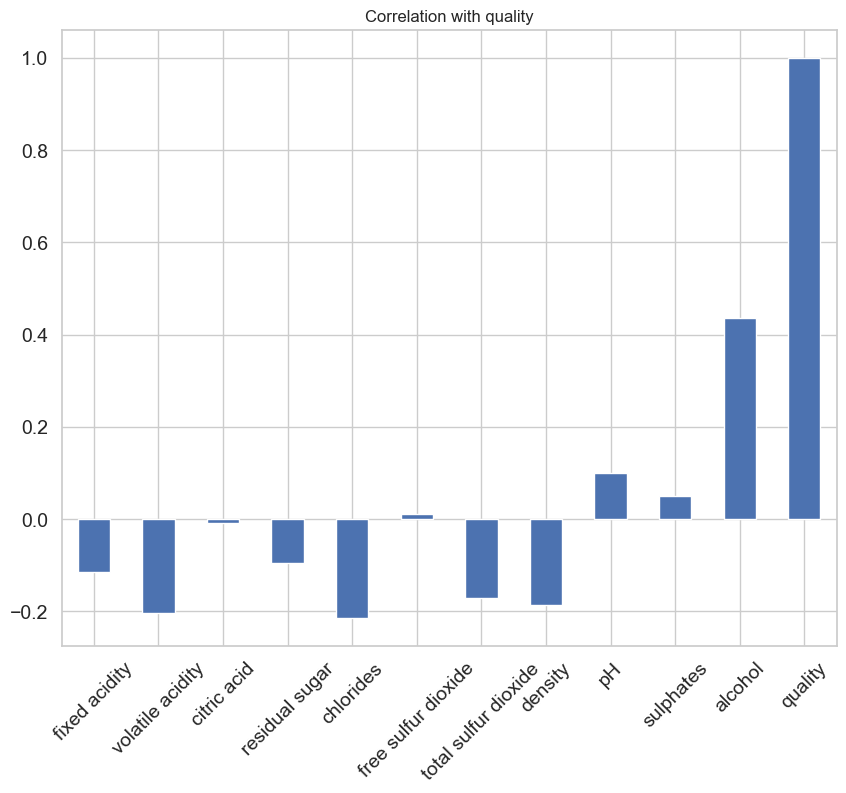

In [153]:
# relationship between wine and other characteristics
df.corrwith(df['quality']).plot.bar(figsize=(10,8), title='Correlation with quality', rot=45, grid=True, fontsize=14)

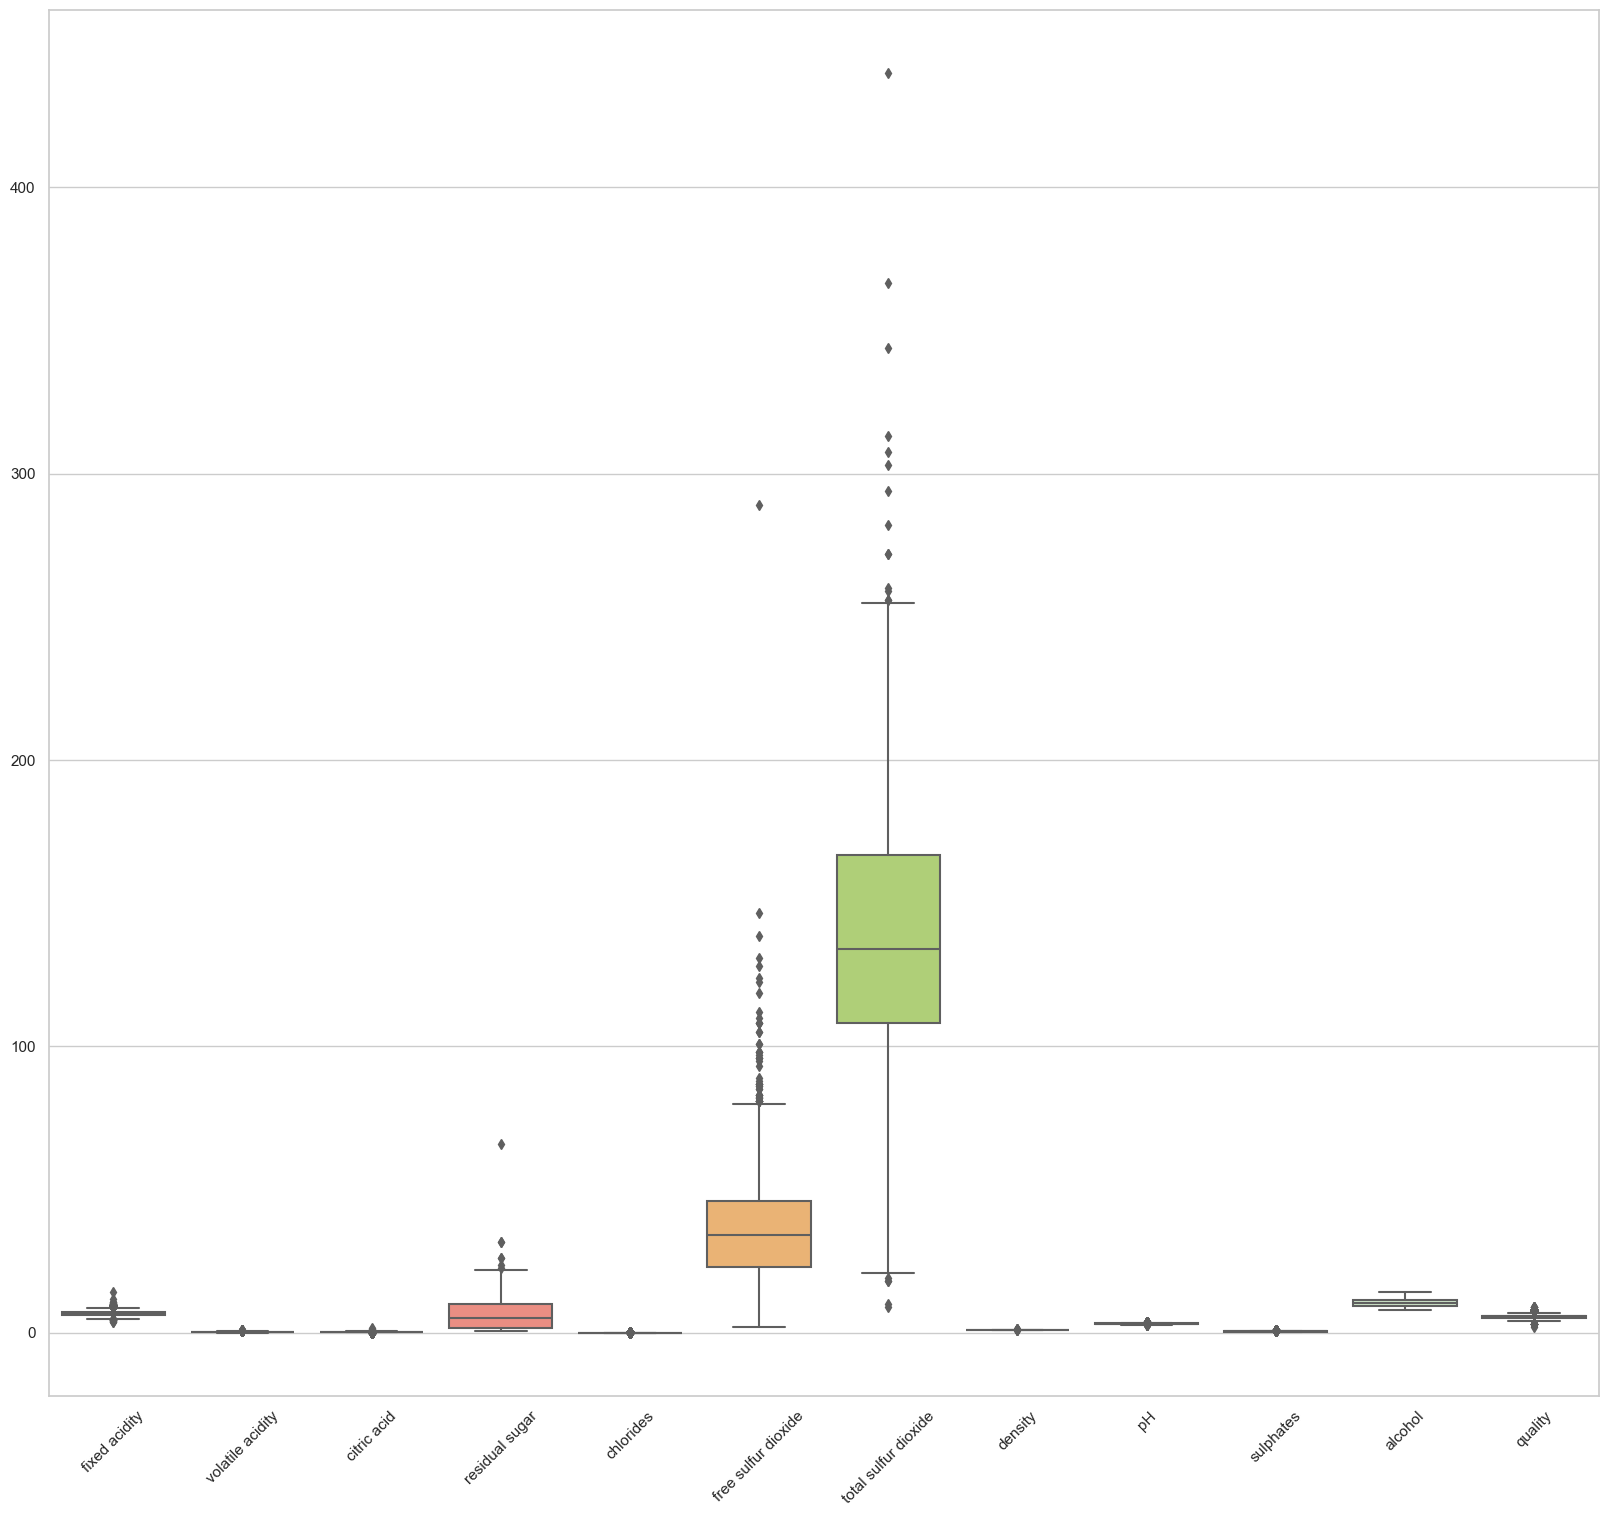

In [154]:
sns.set(style='whitegrid')
plt.figure(figsize=(20, 18))
sns.boxplot(data=df, palette='Set3')
plt.xticks(rotation=45)
plt.show()

In [155]:
# Remove outliers. so that we can get a better result

lower_limit = df['free sulfur dioxide'].mean() - 3 * df['free sulfur dioxide'].std()
upper_limit = df['free sulfur dioxide'].mean() + 3 * df['free sulfur dioxide'].std()

print(lower_limit, upper_limit)


-15.728847267354467 86.31753759783183


In [156]:
df_sulfur_without_outliers = df[(df['free sulfur dioxide'] > lower_limit) & (df['free sulfur dioxide'] < upper_limit)]


df_sulfur_without_outliers.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6


In [157]:
print(df.shape[0], df_sulfur_without_outliers.shape[0])

# difference between the two dataframes
print(df.shape[0] - df_sulfur_without_outliers.shape[0])

4902 4870
32


In [158]:
# remove outliers from total sulfur dioxide
total_sulfur_lower_limit = df['total sulfur dioxide'].mean() - 3 * df['total sulfur dioxide'].std()
total_sulfur_upper_limit = df['total sulfur dioxide'].mean() + 3 * df['total sulfur dioxide'].std()

print(total_sulfur_lower_limit, total_sulfur_upper_limit)

10.651247031926715 265.93519931650246


In [159]:
total_sulfur_df_without_outliers = df_sulfur_without_outliers[(df_sulfur_without_outliers['total sulfur dioxide']> total_sulfur_lower_limit) & (df_sulfur_without_outliers['total sulfur dioxide'] < total_sulfur_upper_limit)]

total_sulfur_df_without_outliers.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6


In [160]:
df_sulfur_without_outliers.shape[0] - total_sulfur_df_without_outliers.shape[0]

8

In [161]:
# remove outliers from residual sugar
residual_sugar_lower_limit = df['residual sugar'].mean() - 3 * df['residual sugar'].std()
residual_sugar_upper_limit = df['residual sugar'].mean() + 3 * df['residual sugar'].std()

print(residual_sugar_lower_limit, residual_sugar_upper_limit)

-8.826723776855282 21.60242757122493


In [162]:
residual_sugar_df_without_outliers = total_sulfur_df_without_outliers[(total_sulfur_df_without_outliers['residual sugar'] > residual_sugar_lower_limit) & (total_sulfur_df_without_outliers['residual sugar'] < residual_sugar_upper_limit)]

residual_sugar_df_without_outliers.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,6
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,6
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,6
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,6


In [163]:
total_sulfur_df_without_outliers.shape[0] - residual_sugar_df_without_outliers.shape[0]

9

In [164]:
residual_sugar_df_without_outliers.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [165]:
# this is work main df without outliers 
df = residual_sugar_df_without_outliers

In [166]:
df.quality.value_counts()

quality
6    2182
5    1440
7     878
8     171
4     160
3      16
9       5
2       1
Name: count, dtype: int64

In [167]:
#  0 - 5 = bad wine 
# 6 - 10 = good 

# first convert quality to int
df['quality'] = df['quality'].astype(int)

# list of quality in string
quality_list = { 0:'bad', 1:'bad', 2:'bad', 3: 'bad', 4: 'bad', 5: 'bad', 6: 'good', 7: 'good', 8: 'good', 9: 'good', 10: 'good'}

# map quality to string
df['quality'] = df['quality'].map(quality_list)

print(df['quality'].value_counts())


quality
good    3236
bad     1617
Name: count, dtype: int64


In [168]:
# df['quality'].value_counts()
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,good
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,good
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,good
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,good
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,good


Most of the characteristics do not have a large correlation with the grade, but the alcohol content was the highest at 0.43. The next hight characteristics is density. Volatile acidity shows a strong negative correlation with grade.

## Quality Test


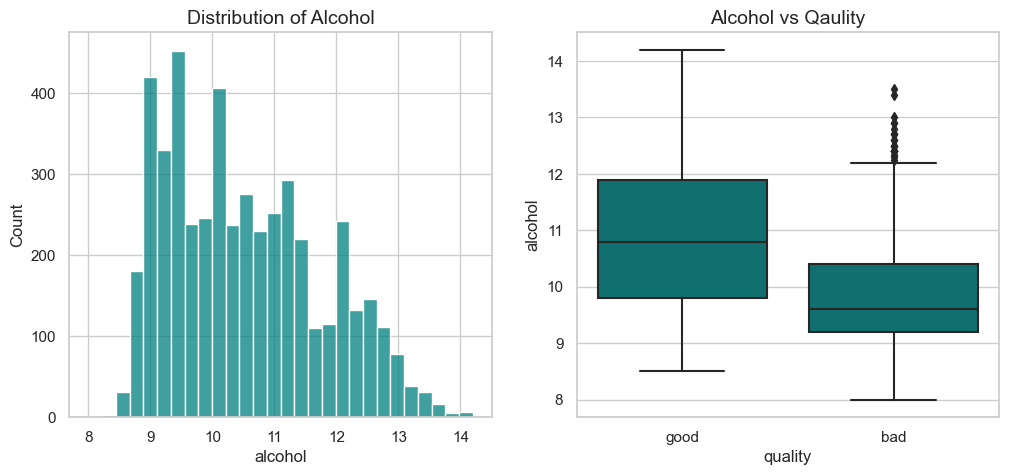

In [169]:
# alcohol level for distribution of class of alcohol data
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.histplot(data=df, x='alcohol', ax=ax[0], color='teal')
sns.boxplot(data=df, x='quality', y='alcohol', ax=ax[1], color='teal')
ax[0].set_title('Distribution of Alcohol', fontsize=14)
ax[1].set_title('Alcohol vs Qaulity', fontsize=14)
plt.show()


In [170]:
# percentage of concentrated alcohol in wine
# df.groupby('alcohol')['quality'].mean().plot.bar(figsize=(10,8), color='teal')
df.groupby('alcohol')['quality'].value_counts().sort_values(ascending=False)[0:5]
# shows that 9.5% alcohol is the most common in the dataset and 9.4% is the second most common

alcohol  quality
9.40     bad        140
11.00    good       137
9.50     bad        124
9.20     bad        113
10.50    good       112
Name: count, dtype: int64

In [174]:
df.isnull().sum()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.00,0.27,0.36,20.70,0.04,45.00,170.00,1.00,3.00,0.45,8.80,good
1,6.30,0.30,0.34,1.60,0.05,14.00,132.00,0.99,3.30,0.49,9.50,good
2,8.10,0.28,0.40,6.90,0.05,30.00,97.00,1.00,3.26,0.44,10.10,good
3,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,good
4,7.20,0.23,0.32,8.50,0.06,47.00,186.00,1.00,3.19,0.40,9.90,good


In [175]:
df['quality'] = df['quality'].map({'bad': 0, 'good': 1})

In [178]:
print(df.dtypes)


fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object


In [179]:
import statsmodels.api as sm



In [181]:
sm.Logit(df['quality'], df.drop('quality', axis=1)).fit().summary()


Optimization terminated successfully.
         Current function value: 0.502937
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                quality   No. Observations:                 4853
Model:                          Logit   Df Residuals:                     4842
Method:                           MLE   Df Model:                           10
Date:                Sun, 24 Dec 2023   Pseudo R-squ.:                  0.2097
Time:                        15:25:05   Log-Likelihood:                -2440.8
converged:                       True   LL-Null:                       -3088.5
Covariance Type:            nonrobust   LLR p-value:                3.453e-272
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity           -0.1484      0.048     -3.095      0.002      -0.242      -0.054
volatile acidity        -6.3945      0.413    -15.471      0.000      -7.205      -5.584
citric acid             -0.1085      0.303     -0.358      0.721      -0.703       0.486
residual sugar           0.0683      0.009      7.956      0.000       0.051       0.085
chlorides                0.4956      1.649      0.301      0.764      -2.736       3.727
free sulfur dioxide      0.0172      0.003      5.745      0.000       0.011       0.023
total sulfur dioxide    -0.0028      0.001     -2.349      0.019      -0.005      -0.000
density                 -9.2383      1.150     -8.033      0.000     -11.492      -6.984
pH                       0.1754      0.273      0.644      0.520      -0.359       0.710
sulphates                1.4351      0.348      4.119      0.000       0.752       2.118
alcohol                  1.0480      0.045     23.459      0.000       0.960       1.136
========================================================================================
"""

In [209]:
correlation_matrix = df.corr()

print(correlation_matrix)

                      fixed acidity  volatile acidity  citric acid  \
fixed acidity                  1.00             -0.02         0.29   
volatile acidity              -0.02              1.00        -0.15   
citric acid                    0.29             -0.15         1.00   
residual sugar                 0.08              0.04         0.09   
chlorides                      0.03              0.14         0.10   
free sulfur dioxide           -0.05             -0.10         0.12   
total sulfur dioxide           0.08              0.08         0.12   
density                        0.14              0.21         0.04   
pH                            -0.42             -0.03        -0.16   
sulphates                     -0.01             -0.02         0.06   
alcohol                       -0.12              0.06        -0.08   
quality                       -0.09             -0.23        -0.00   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity    

In [211]:
eigenvalues, _ = np.linalg.eig(correlation_matrix)
condition_index = np.sqrt(np.max(eigenvalues) / np.min(eigenvalues))


In [212]:
print(condition_index)

3.17972896979835


In [213]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif['features'] = df.columns
vif.round(1)


,VIF Factor,features
0,93.50,fixed acidity
1,10.20,volatile acidity
2,10.10,citric acid
3,4.10,residual sugar
4,6.10,chlorides
5,10.50,free sulfur dioxide
6,25.20,total sulfur dioxide
7,1072.80,density
8,607.50,pH
9,20.60,sulphates


## Logistic regression

In [196]:
targetVariable = 'quality'
# predictors = ['alcohol', 'density']
# predictors = ['alcohol', 'density', 'volatile acidity', 'pH', 'fixed acidity', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide', 'chlorides', 'citric acid', 'sulphates']
predictors = df.drop('quality', axis=1).columns.tolist()
X = df[predictors].values
y = df[targetVariable].values

In [197]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=42)

In [198]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [199]:
y_pred = lr.predict(X_test)
y_pred

array([1, 1, 0, ..., 1, 1, 0])

In [200]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, y_pred)
cm

array([[235, 268],
       [116, 837]])

# Model Evaluation

In [201]:
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Precision: ', metrics.precision_score(y_test, y_pred))
print('Recall (Sensitivity): ', metrics.recall_score(y_test, y_pred))
tn, fp, fn, tp = metrics.confusion_matrix(y_test, y_pred).ravel()
specificity = tn / (tn + fp)
print('Specificity: ', specificity)

# need sensitivity and specificity


Accuracy:  0.7362637362637363
Precision:  0.7574660633484163
Recall (Sensitivity):  0.8782791185729276
Specificity:  0.4671968190854871


## Decision Tree

In [202]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=1134)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1134)

Accuracy:  0.7884615384615384


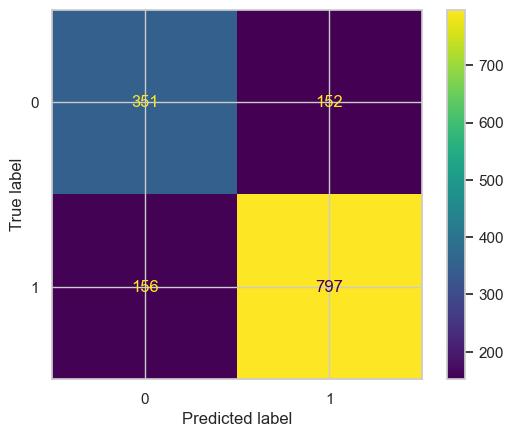

In [203]:
#  predict the test data
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = dt.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=dt.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot()
print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))



##  Random Forest

In [204]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=1134)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=1134)

In [205]:
# y_pred = rf.predict(X_test)
# accuracy = metrics.accuracy_score(y_test, y_pred)
# print('Accuracy: ', accuracy)

## Support Vector

In [206]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

svc = SVC(random_state=1134)
svc.fit(X_train, y_train)

SVC(random_state=1134)

In [207]:
y_pred = svc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: ', accuracy)

Accuracy:  0.654532967032967


# you can Overfitting test 